In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [103]:
Employee_dataset=pd.read_csv("Employee.csv")

Employee_dataset

In [104]:
# Display the structure of the dataset
print(Employee_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB
None


In [105]:
# Display summary statistics of numeric variables
print(Employee_dataset.describe())

         Base_Salary   Overtime_Pay  Longevity_Pay
count   10291.000000   10291.000000   10291.000000
mean    90312.165744    8081.288954    1533.882816
std     31240.842929   16491.833017    3209.041070
min     11147.240000       0.000000       0.000000
25%     70023.000000       0.000000       0.000000
50%     87328.000000     258.420000       0.000000
75%    108084.000000    9190.970000    1225.680000
max    292000.000000  227428.990000   20279.460000


In [106]:
# Check for missing values
missing_values = Employee_dataset.isnull().sum()
print(missing_values)

Department          0
Department_Name     0
Division            0
Gender              0
Base_Salary         0
Overtime_Pay        0
Longevity_Pay       0
Grade              33
dtype: int64


In [107]:
# Removing rows with any missing values
cleaned_dataset = Employee_dataset.dropna()

# Check the result
print(cleaned_dataset.isnull().sum())
print("Original dataset shape:", Employee_dataset.shape)
print("Cleaned dataset shape:", cleaned_dataset.shape)

Department         0
Department_Name    0
Division           0
Gender             0
Base_Salary        0
Overtime_Pay       0
Longevity_Pay      0
Grade              0
dtype: int64
Original dataset shape: (10291, 8)
Cleaned dataset shape: (10258, 8)


In [108]:
# Removing columns with any missing values
cleaned_dataset = Employee_dataset.dropna(axis=1)

# Check the result
print(cleaned_dataset.isnull().sum())
print("Original dataset shape:", Employee_dataset.shape)
print("Cleaned dataset shape:", cleaned_dataset.shape)

Department         0
Department_Name    0
Division           0
Gender             0
Base_Salary        0
Overtime_Pay       0
Longevity_Pay      0
dtype: int64
Original dataset shape: (10291, 8)
Cleaned dataset shape: (10291, 7)


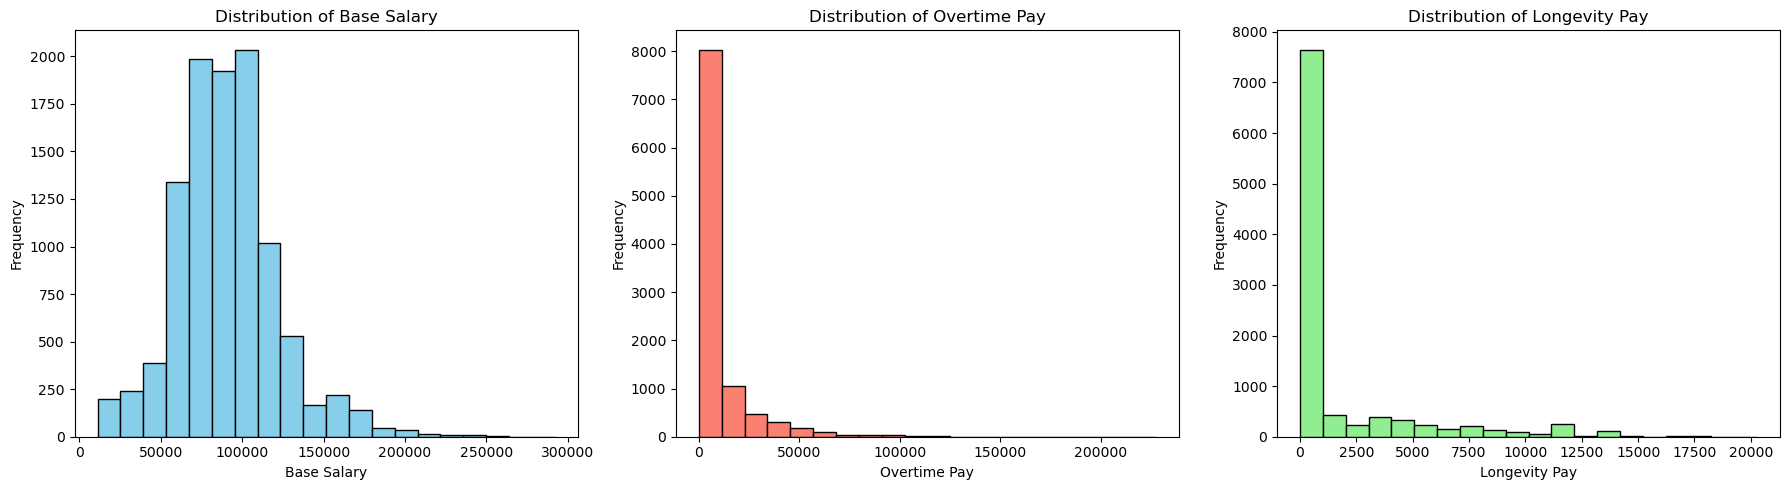

In [109]:

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot histogram for base salary
axes[0].hist(Employee_dataset['Base_Salary'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Base Salary')
axes[0].set_xlabel('Base Salary')
axes[0].set_ylabel('Frequency')

# Plot histogram for overtime pay
axes[1].hist(Employee_dataset['Overtime_Pay'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Overtime Pay')
axes[1].set_xlabel('Overtime Pay')
axes[1].set_ylabel('Frequency')

# Plot histogram for longevity pay
axes[2].hist(Employee_dataset['Longevity_Pay'], bins=20, color='lightgreen', edgecolor='black')
axes[2].set_title('Distribution of Longevity Pay')
axes[2].set_xlabel('Longevity Pay')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [110]:
import pandas as pd

# Define bins for salary, overtime pay, and longevity pay
Salary_bins = pd.cut(Employee_dataset['Base_Salary'], bins=4)  # Adjust the number of bins as necessary
Overtime_bins = pd.cut(Employee_dataset['Overtime_Pay'], bins=4, include_lowest=True)
Longevity_bins = pd.cut(Employee_dataset['Longevity_Pay'], bins=4, include_lowest=True)

# Count the number of occurrences in each bin
Salary_counts = Salary_bins.value_counts()
Overtime_counts = Overtime_bins.value_counts()
Longevity_counts = Longevity_bins.value_counts()

# Sort index for better visualization (optional)
Salary_counts = Salary_counts.sort_index()
Overtime_counts = Overtime_counts.sort_index()
Longevity_counts = Longevity_counts.sort_index()

# Print the counts for each bin
print("Salary Counts:")
print(Salary_counts)
print("\nOvertime Pay Counts:")
print(Overtime_counts)
print("\nLongevity Pay Counts:")
print(Longevity_counts)


Salary Counts:
Base_Salary
(10866.387, 81360.43]     4148
(81360.43, 151573.62]     5671
(151573.62, 221786.81]     454
(221786.81, 292000.0]       18
Name: count, dtype: int64

Overtime Pay Counts:
Overtime_Pay
(-227.43, 56857.248]        10049
(56857.248, 113714.495]       218
(113714.495, 170571.742]       18
(170571.742, 227428.99]         6
Name: count, dtype: int64

Longevity Pay Counts:
Longevity_Pay
(-20.28, 5069.865]       9018
(5069.865, 10139.73]      809
(10139.73, 15209.595]     436
(15209.595, 20279.46]      28
Name: count, dtype: int64


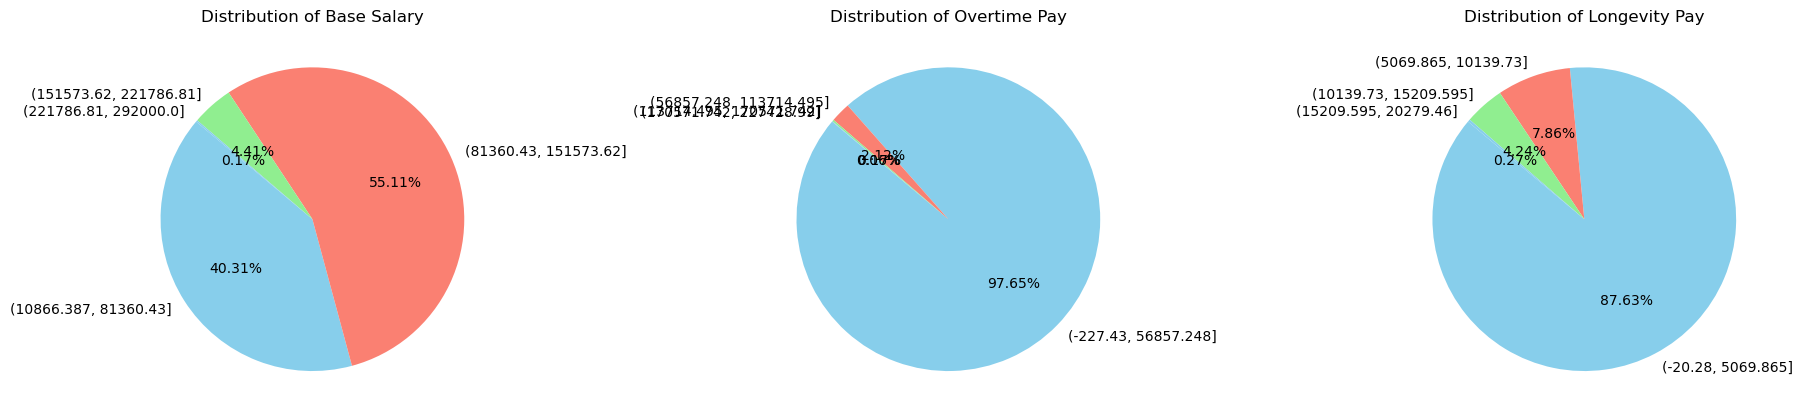

In [111]:
# Assuming you have Salary_counts, Overtime_counts, and Longevity_counts calculated earlier

# Create figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 9))

# Define labels and data for pie charts
labels = ['Base Salary', 'Overtime Pay', 'Longevity Pay']
data = [Salary_counts, Overtime_counts, Longevity_counts]

# Specify custom colors for the pie charts
colors = ['skyblue', 'salmon', 'lightgreen']

# Plot pie charts
for i, ax in enumerate(axes):
    ax.pie(data[i], labels=data[i].index, autopct='%2.2f%%', startangle=140, colors=colors)
    ax.set_title(f'Distribution of {labels[i]}')

# Show the plot
plt.tight_layout()
plt.show()



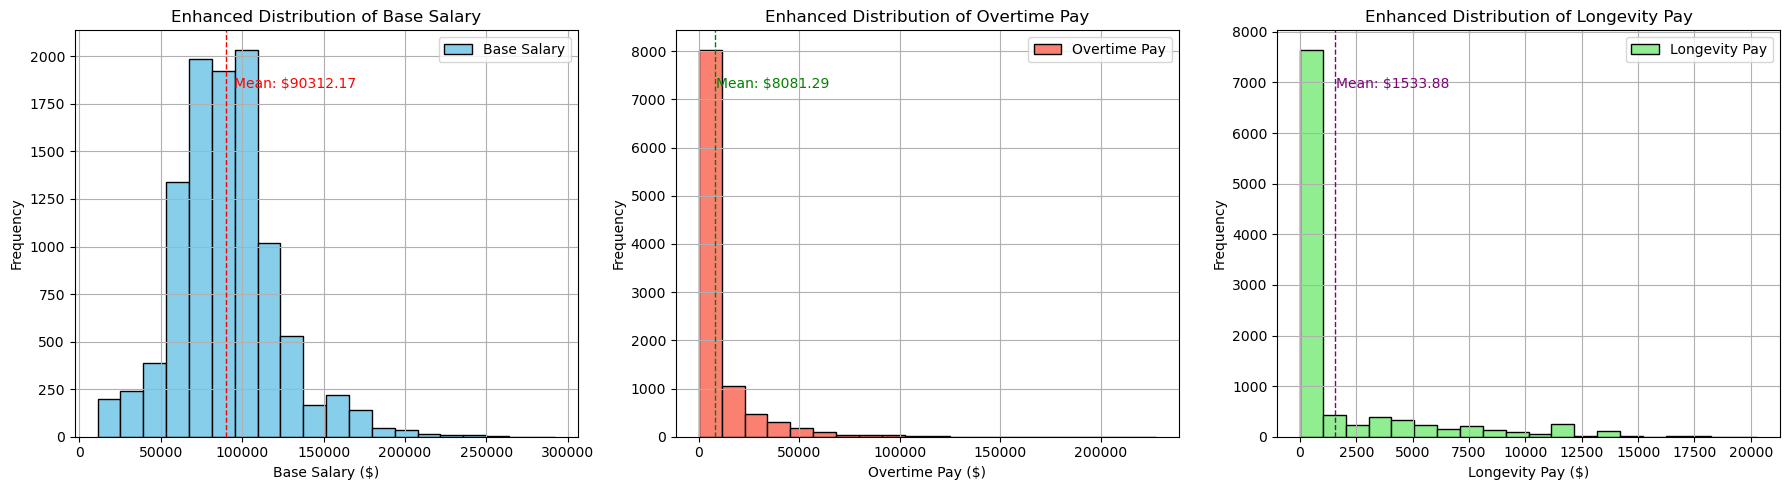

In [112]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot histogram for base salary
n, bins, patches = axes[0].hist(Employee_dataset['Base_Salary'].dropna(), bins=20, color='skyblue', edgecolor='black', label='Base Salary')
axes[0].set_title('Enhanced Distribution of Base Salary')
axes[0].set_xlabel('Base Salary ($)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True)

# Add mean line and text for base salary
mean_salary = Employee_dataset['Base_Salary'].mean()
axes[0].axvline(mean_salary, color='red', linestyle='dashed', linewidth=1)
axes[0].text(mean_salary*1.05, max(n)*0.9, 'Mean: ${:.2f}'.format(mean_salary), color='red')

# Plot histogram for overtime pay
n, bins, patches = axes[1].hist(Employee_dataset['Overtime_Pay'].dropna(), bins=20, color='salmon', edgecolor='black', label='Overtime Pay')
axes[1].set_title('Enhanced Distribution of Overtime Pay')
axes[1].set_xlabel('Overtime Pay ($)')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True)

# Add mean line and text for overtime pay
mean_overtime = Employee_dataset['Overtime_Pay'].mean()
axes[1].axvline(mean_overtime, color='green', linestyle='dashed', linewidth=1)
axes[1].text(mean_overtime*1.05, max(n)*0.9, 'Mean: ${:.2f}'.format(mean_overtime), color='green')

# Plot histogram for longevity pay
n, bins, patches = axes[2].hist(Employee_dataset['Longevity_Pay'].dropna(), bins=20, color='lightgreen', edgecolor='black', label='Longevity Pay')
axes[2].set_title('Enhanced Distribution of Longevity Pay')
axes[2].set_xlabel('Longevity Pay ($)')
axes[2].set_ylabel('Frequency')
axes[2].legend()
axes[2].grid(True)

# Add mean line and text for longevity pay
mean_longevity = Employee_dataset['Longevity_Pay'].mean()
axes[2].axvline(mean_longevity, color='purple', linestyle='dashed', linewidth=1)
axes[2].text(mean_longevity*1.05, max(n)*0.9, 'Mean: ${:.2f}'.format(mean_longevity), color='purple')

plt.tight_layout()
plt.show()


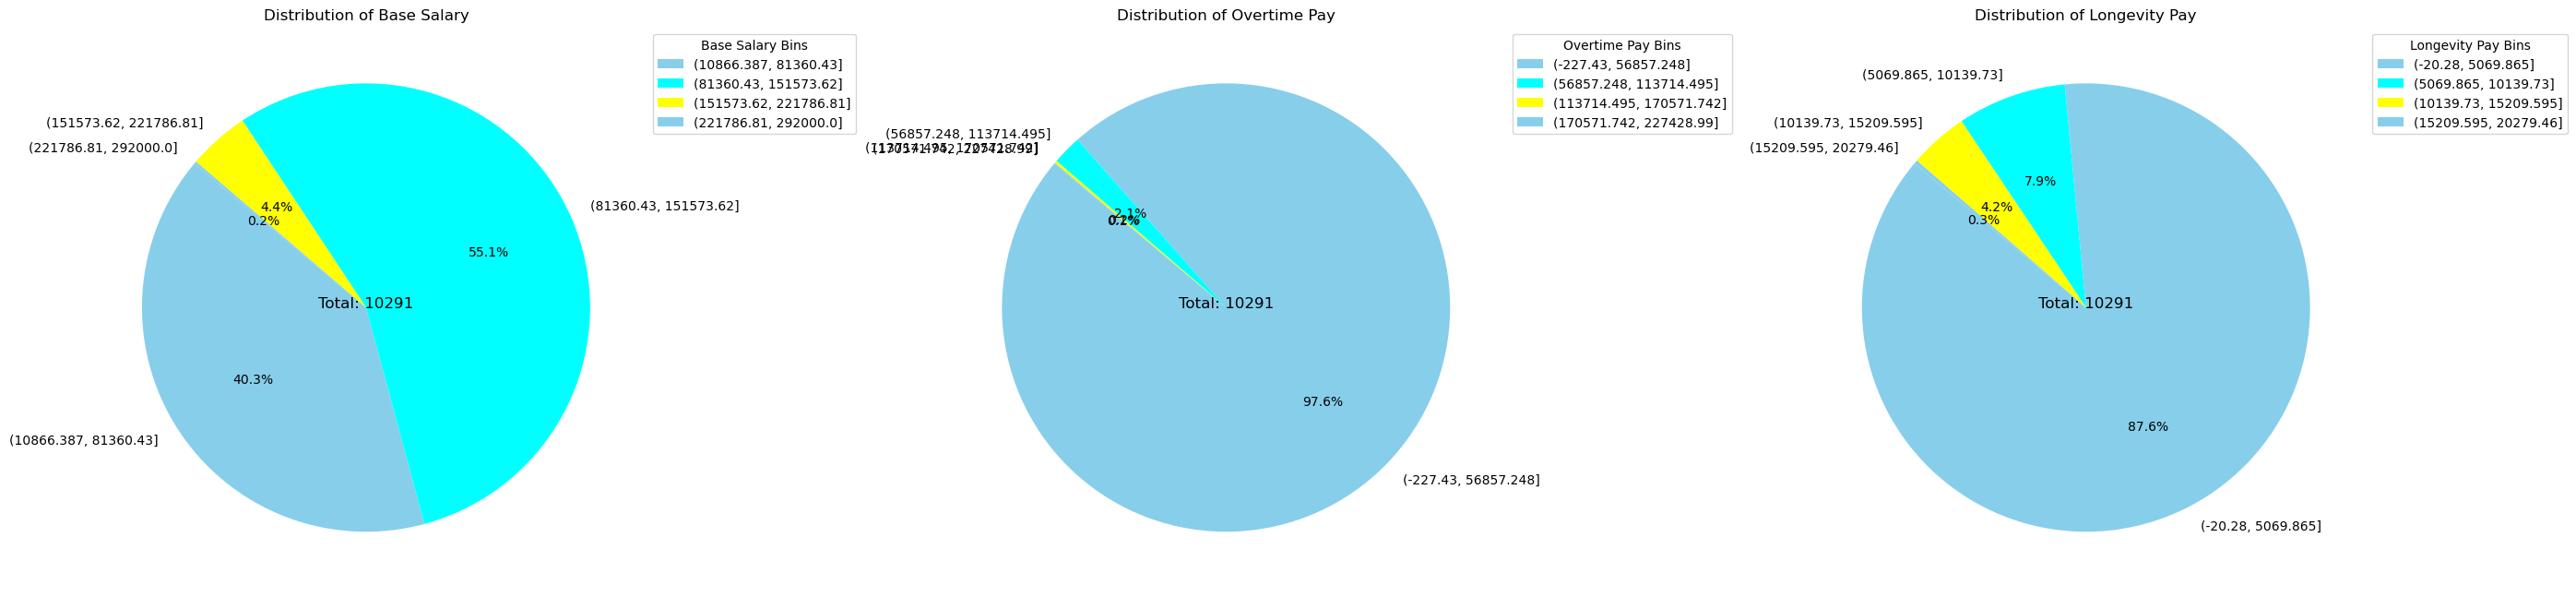

In [113]:
import matplotlib.pyplot as plt

# Assuming you have Salary_counts, Overtime_counts, and Longevity_counts calculated earlier

# Define data and labels
data = [Salary_counts, Overtime_counts, Longevity_counts]
labels = ['Base Salary', 'Overtime Pay', 'Longevity Pay']

# Define colors for each pie chart
colors = ['skyblue', 'cyan', 'yellow']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(28, 19))

# Plot pie charts
for i, ax in enumerate(axes):
    ax.pie(data[i], labels=data[i].index, autopct='%1.1f%%', startangle=140, colors=colors)
    ax.set_title(f'Distribution of {labels[i]}')

# Add legend
axes[0].legend(data[0].index, title="Base Salary Bins", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
axes[1].legend(data[1].index, title="Overtime Pay Bins", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
axes[2].legend(data[2].index, title="Longevity Pay Bins", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add grid lines
for ax in axes:
    ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

# Add text annotation for total counts
for i, ax in enumerate(axes):
    total = sum(data[i])
    ax.text(0, 0, f'Total: {total}', fontsize=12, color='black', ha='center')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



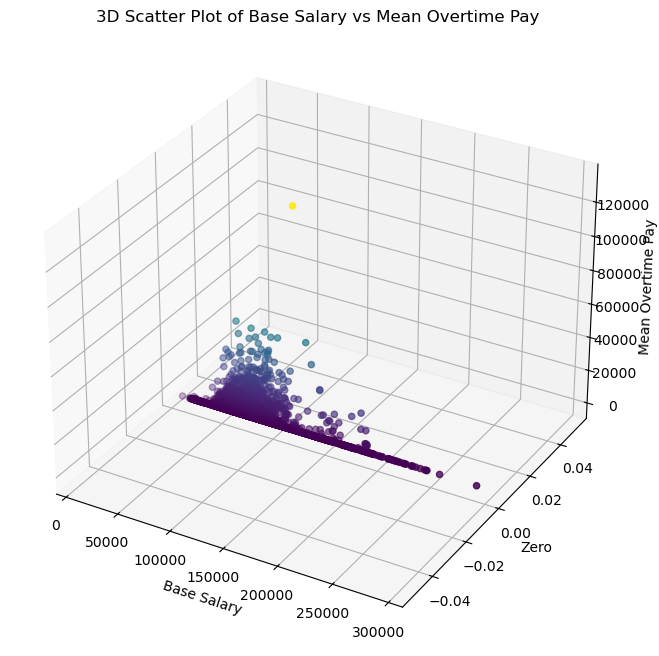

In [127]:
from mpl_toolkits.mplot3d import Axes3D

# Calculate the mean overtime pay for each category of base salary
mean_overtime_pay = Employee_dataset.groupby('Base_Salary')['Overtime_Pay'].mean()

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define x, y, and z data
x_data = mean_overtime_pay.index
y_data = [0] * len(mean_overtime_pay)  # Since we are plotting in 3D, y-data will be all zeros
z_data = mean_overtime_pay.values

# Plot the scatter plot
ax.scatter(x_data, y_data, z_data, c=z_data, cmap='viridis')

# Set labels and title
ax.set_xlabel('Base Salary')
ax.set_ylabel('Zero')  # Dummy y-axis label
ax.set_zlabel('Mean Overtime Pay')
ax.set_title('3D Scatter Plot of Base Salary vs Mean Overtime Pay')

# Show the plot
plt.show()






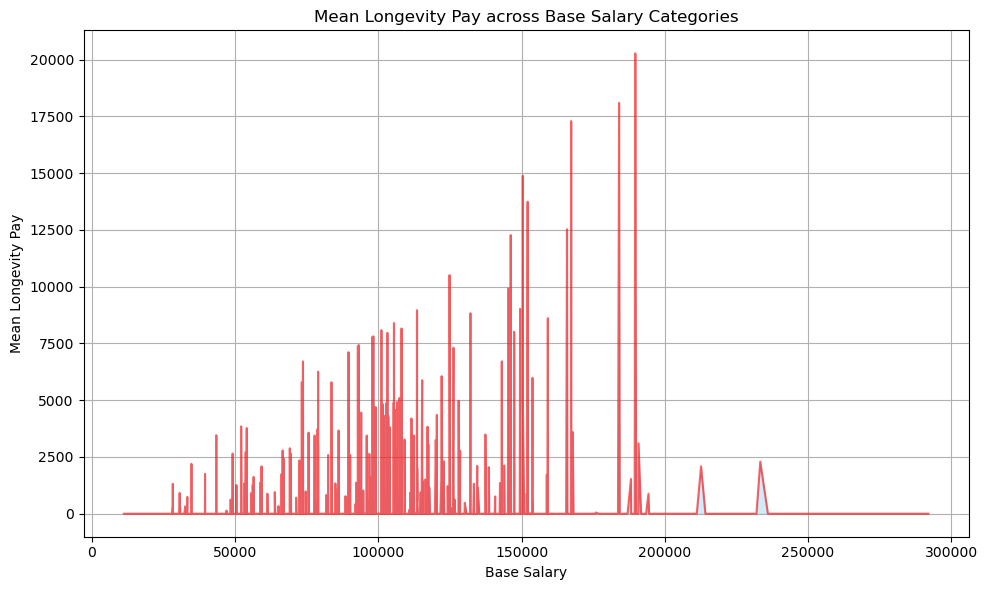

In [118]:
import matplotlib.pyplot as plt

# Calculate the mean longevity pay for each category of base salary
mean_longevity_pay = Employee_dataset.groupby('Base_Salary')['Longevity_Pay'].mean()

# Plot the area chart
plt.figure(figsize=(10, 6))
plt.fill_between(mean_longevity_pay.index, mean_longevity_pay.values, color='skyblue', alpha=0.4)
plt.plot(mean_longevity_pay.index, mean_longevity_pay.values, color='red', alpha=0.6)

# Add labels and title
plt.title('Mean Longevity Pay across Base Salary Categories')
plt.xlabel('Base Salary')
plt.ylabel('Mean Longevity Pay')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()




From the visualizations generated, we can make the following observations:

Distribution of Base Salary and Overtime Pay:

The histograms show the distribution of base salary and overtime pay within the dataset.
Both distributions appear to be right-skewed, indicating that the majority of employees may have lower base salaries and overtime pay, with fewer employees having higher values.
The addition of grid lines and titles enhances the clarity of the histograms.
Relationship Between Base Salary and Mean Overtime Pay:

The scatter plot, line graph, and pie chart illustrate the relationship between base salary and mean overtime pay.
There doesn't seem to be a clear linear relationship between base salary and mean overtime pay. Instead, the data points appear scattered, suggesting that the two variables may not be strongly correlated.
The area chart provides a visual representation of the mean overtime pay across different categories of base salary, but it doesn't show the relationship between individual data points.
The pie chart displays the distribution of mean overtime pay across different categories of base salary, making it easier to identify which salary range has the highest or lowest mean overtime pay.
Distribution of Mean Longevity Pay Across Base Salary Categories:

The 3D scatter plot visualizes the distribution of mean longevity pay across different categories of base salary.
However, 3D scatter plots can be challenging to interpret, and in this case, it may not provide significant insights into the relationship between base salary and mean longevity pay.
Overall, these visualizations offer valuable insights into the distribution and relationships between various salary-related variables in the dataset. Further analysis, such as correlation calculations or regression modeling, may be necessary to explore the relationships more comprehensively.



